In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

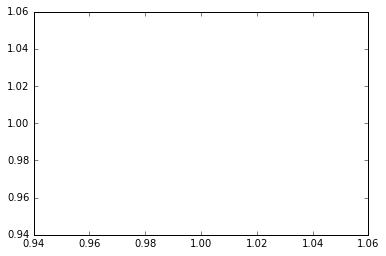

In [2]:
plt.plot(1,1)

# Load and plot the single cell qPCR data

In [3]:
# get the data
import pods, pandas as pd
data = pods.datasets.singlecell()
genes = data['Y']
labels = data['labels']
label_dict = dict(((i,l) for i,l in enumerate(labels)))
#print label_dict
N = genes.shape[0]
G = genes.shape[1]
genes.describe()

,Actb,Ahcy,Aqp3,Atp12a,Bmp4,Cdx2,Creb312,Cebpa,Dab2,DppaI,...,Sox2,Sall4,Sox17,Snail,Sox13,Tcfap2a,Tcfap2c,Tcf23,Utf1,Tspan8
count,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,...,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02,4.370000e+02
mean,2.089245e-08,2.400458e-08,3.011442e-08,2.009153e-08,1.416476e-08,2.661327e-08,1.828375e-08,2.329519e-08,2.993135e-08,2.077803e-08,...,2.180778e-08,2.146453e-08,2.077803e-08,2.585812e-08,2.473684e-08,2.670481e-08,2.009153e-08,2.231121e-08,2.263158e-08,2.606407e-08
std,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,...,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00,1.001146e+00
min,-2.997659e+00,-2.140030e+00,-1.768643e+00,-2.355953e+00,-4.420191e+00,-1.972546e+00,-2.493296e+00,-2.290915e+00,-1.641875e+00,-1.755517e+00,...,-2.246728e+00,-2.015028e+00,-2.960914e+00,-1.964500e+00,-2.033562e+00,-1.886886e+00,-2.238215e+00,-2.089612e+00,-1.825355e+00,-2.035440e+00
25%,-7.169942e-01,-7.796685e-01,-7.171038e-01,-9.337937e-01,-2.516838e-01,-6.446426e-01,-7.717112e-01,-8.545864e-01,-6.703301e-01,-1.018770e+00,...,-7.734272e-01,-9.343944e-01,-6.515803e-01,-7.255418e-01,-7.276985e-01,-8.376303e-01,-9.886838e-01,-9.197137e-01,-9.236930e-01,-7.673579e-01
50%,9.227372e-02,-1.782182e-01,-1.842611e-01,2.928931e-01,2.146358e-01,-1.353097e-01,2.772327e-01,-6.806050e-02,-2.415102e-01,1.097815e-01,...,7.709900e-03,8.293864e-02,-3.701860e-02,-1.972392e-01,-1.336842e-01,-2.656403e-01,2.828122e-01,-1.836380e-02,-1.127644e-01,-2.462695e-01
75%,6.808323e-01,6.245760e-01,3.312916e-01,8.234601e-01,6.738631e-01,4.854397e-01,8.213037e-01,9.125241e-01,4.854736e-01,9.259312e-01,...,8.608111e-01,8.312436e-01,6.177259e-01,1.082358e+00,5.329677e-01,9.967453e-01,8.099583e-01,1.022974e+00,8.257577e-01,6.422915e-01
max,2.490650e+00,3.564713e+00,2.627702e+00,1.687127e+00,1.569268e+00,3.427747e+00,1.826346e+00,1.729923e+00,2.780331e+00,1.671790e+00,...,1.709987e+00,4.489121e+00,3.565258e+00,1.655467e+00,2.231074e+00,2.104293e+00,4.187598e+00,1.808619e+00,2.208022e+00,2.270316e+00


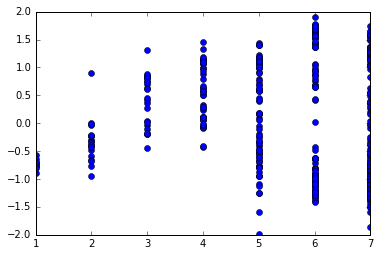

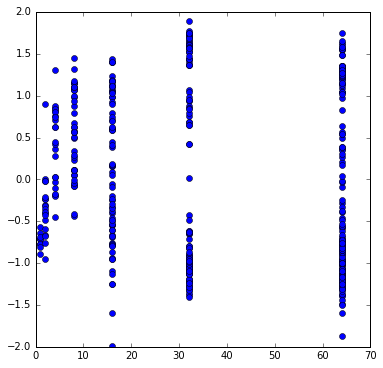

In [4]:
stageCell = np.zeros(N)
stageN = np.zeros(N)
for i,l in enumerate(labels):
    stageCell[i] = int(l[:2])
    stageN[i] = np.log2(stageCell[i]) + 1
    
plt.plot(stageN, genes.loc[:,'Id2'],'bo')
fig = plt.figure(figsize=(6,6))
plt.plot(stageCell, genes.loc[:,'Id2'],'bo')

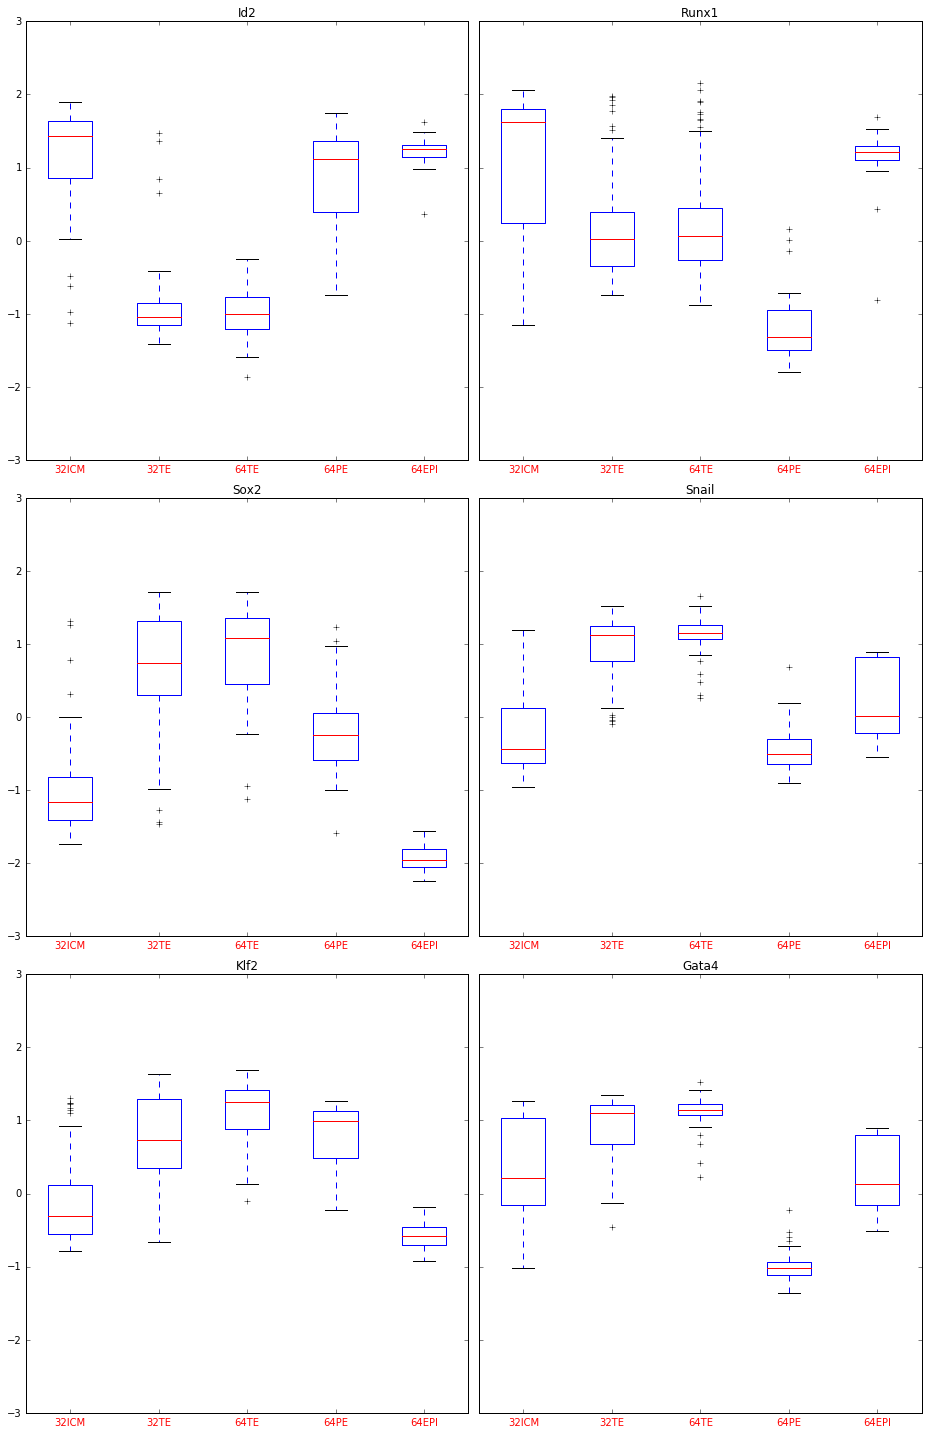

In [5]:
fig, ax = plt.subplots(3,2,figsize=(13,20), sharey=True)
#plt.setp(ax, xticks = [1,2,3,4,5,6,7,8], xticklabels=['1', '2', '4', '8', '16', '32', '64',''])
#plt.setp(ax, xticks=[range(8)], xticklabels=['1', '2', '4', '8', '16', '32', '64', ''])

interestingGeneList =['Id2','Runx1','Sox2','Snail','Klf2','Gata4']

D = len(interestingGeneList)


for ig,g in enumerate(interestingGeneList):
    if(D != 1):
        p = ax.flatten()[ig]
    else:
        p = ax
    plt.sca(p)
    plt.xticks(range(1,9), ['1', '2', '4', '8', '16', '32', '64',' '], color='red')

    p.set_title(g)
    
    idxTE32 = np.flatnonzero(genes.loc[:,g].index == '32 TE')
    idxTE64 = np.flatnonzero(genes.loc[:,g].index == '64 TE')        
    idx32ICM = np.flatnonzero(genes.loc[:,g].index == '32 ICM')
    idx64PE = np.flatnonzero(genes.loc[:,g].index == '64 PE')
    idx64EPI = np.flatnonzero(genes.loc[:,g].index == '64 EPI')
    
    p.boxplot([genes.loc[:,g].iloc[idx32ICM], genes.loc[:,g].iloc[idxTE32] \
              ,genes.loc[:,g].iloc[idxTE64],genes.loc[:,g].iloc[idx64PE],genes.loc[:,g].iloc[idx64EPI]], \
              labels=['32ICM','32TE','64TE','64PE','64EPI'])
    
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.tight_layout()

# PCA projection to one D
data already 0 mean

In [6]:
def pcaPlot(Xuntransformed, strLabels,Dlatent=2):
    assert Xuntransformed.shape[0] == len(strLabels)
    
    '''Function to plot cumulative plot and first two principla components'''
    # PCA 
    from sklearn.preprocessing import StandardScaler
    X_std = Xuntransformed # No transformStandardScaler().fit_transform(Xuntransformed)
    u,s,v = np.linalg.svd(X_std.T)
    # eigendecomposition
    cov_mat = np.cov(X_std.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort()
    eig_pairs.reverse()
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    print 'Cumulative variance explained ' + str( cum_var_exp[:2] )
    D = len(var_exp)

    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(6, 4))
        plt.bar(range(D), var_exp, alpha=0.5, align='center',label='individual explained variance')
        plt.step(range(D), cum_var_exp, where='mid',             label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.tight_layout()
    # projection matrix
    if(Dlatent == 2):
        matrix_w = np.hstack((eig_pairs[0][1].reshape(D,1),
                          eig_pairs[1][1].reshape(D,1)))
    else:
        matrix_w = eig_pairs[0][1].reshape(D,1)                          
        
    print matrix_w.shape
    Y = X_std.dot(matrix_w)

    # plot PCA on first two principal components
    uniqueLabels = np.unique(strLabels)
    import matplotlib.cm as cm
    colors = cm.rainbow(np.linspace(0, 1, len(uniqueLabels)))
    
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(10, 10))
        for lab,c in zip(uniqueLabels,colors):
            y1 = Y[strLabels==lab, 0]
            if(Dlatent == 2):
                y2 = Y[strLabels==lab, 1]
            else:
                y2 = y1
                
            plt.scatter(y1,
                        y2,
                        label=lab,
                        c=c,s=80)
            if(Dlatent == 2):
                plt.text(np.min(y1),np.min(y2),lab, fontsize=45, color='blue')
            else:
                plt.text(np.max(y1),np.max(y2),lab, fontsize=45, color='blue')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.title('PCA on %gX%g'%Xuntransformed.shape)
    return Y


Cumulative variance explained [ 32.76346433  50.89795686]
(48, 2)


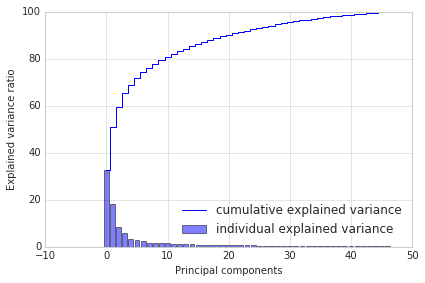

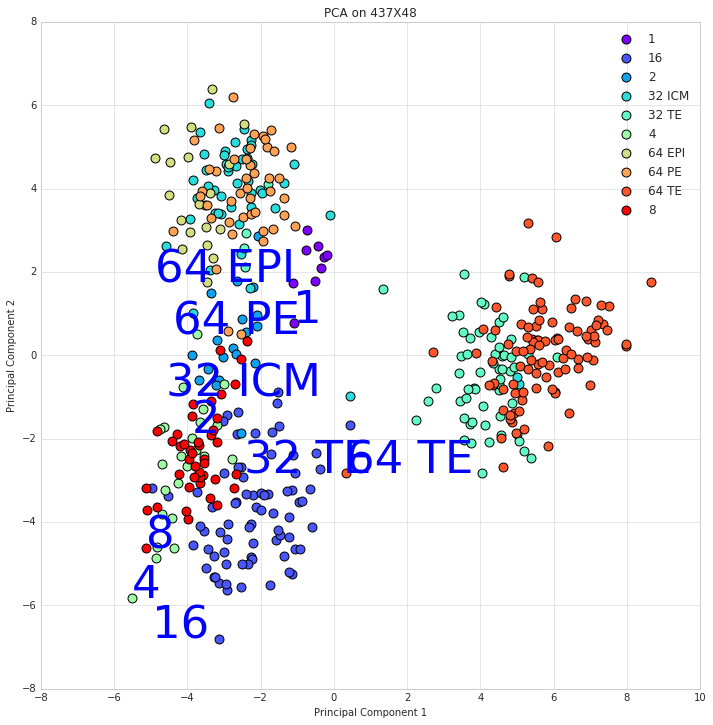

In [7]:
_=pcaPlot(genes.values, labels.values,Dlatent=2)

Cumulative variance explained [ 32.76346433  50.89795686]
(48, 1)


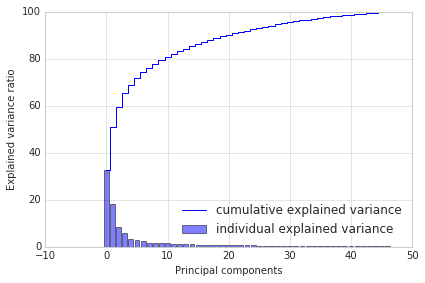

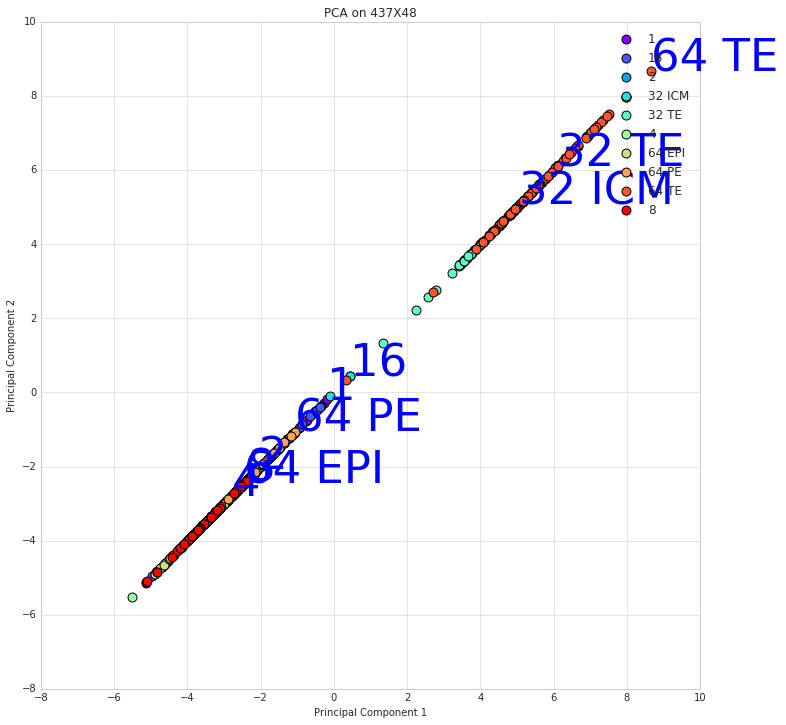

In [8]:
Y=pcaPlot(genes.values, labels.values,Dlatent=1)

In [9]:
import scipy.stats as stats
stats.spearmanr(stageN,Y)

SpearmanrResult(correlation=0.53336055533905946, pvalue=1.7141828190617698e-33)

In [10]:
import tensorflow as tf

In [11]:
Q = 1 # latent dimensions
D = genes.shape[1]
print 'Probabilistic PCA with capture times. D=%g, Q=%g, N=%g' %(D,Q,N)

Probabilistic PCA with capture times. D=48, Q=1, N=437


In [12]:
# Model inputs
fModel32=True # has to be float32 for tensorflow optimizer
if(fModel32):
    t = tf.placeholder(dtype=tf.float32, shape=[N, D]) # Data input
    ct = tf.placeholder(dtype=tf.float32, shape=[N, Q]) # Capture times
    # sigma2 - if same for all entries, is a PCA model, otherwise a factor model

    # Parameters
    W = tf.Variable(tf.ones([D, Q], dtype=tf.float32)) # factor loadings
    mu = tf.Variable(tf.ones([1, D], dtype=tf.float32)) # constant bias
    sigma2 = tf.Variable(tf.ones([D], dtype=tf.float32)) # constant bias
else:
    t = tf.placeholder(dtype=tf.float64, shape=[N, D]) # Data input
    ct = tf.placeholder(dtype=tf.float64, shape=[N, Q]) # Capture times
    # sigma2 - if same for all entries, is a PCA model, otherwise a factor model

    # Parameters
    W = tf.Variable(tf.ones([D, Q], dtype=tf.float64)) # factor loadings
    mu = tf.Variable(tf.ones([1, D], dtype=tf.float64)) # constant bias
    sigma2 = tf.Variable(tf.ones([D], dtype=tf.float64)) # constant bias

In [13]:
C =  tf.matmul(W,tf.transpose(W)) + tf.diag(sigma2)
logdetCSimpleStupid = tf.log(tf.matrix_determinant(C))

L = tf.cholesky(C)
logdetC = 2*tf.reduce_sum(tf.log(tf.diag_part(L))) 
ctW = tf.matmul(ct,tf.transpose(W))
sse = t - tf.tile(mu, [N, 1]) - ctW # N X D
invC = tf.matrix_inverse(C)
s = tf.matmul(sse,tf.matmul(invC,tf.transpose(sse))) # result is N X N
ss = tf.reduce_sum(s)
obj = (N/2.) * logdetC + 0.5 * ss # negative log likelihood

In [14]:
init = tf.initialize_all_variables()

In [16]:
# Get data in right shapes
T=genes.values
captureTimes=stageCell[:,None]
print T.shape
print T.dtype
print captureTimes.shape
print captureTimes.dtype

(437, 48)
float64
(437, 1)
float64


In [17]:
# Convince ourshelves our logdet trick is good
with tf.Session() as sess:
    sess.run(init)
    print sess.run(logdetCSimpleStupid, feed_dict={t:T, ct: captureTimes})
    print sess.run(logdetC, feed_dict={t:T, ct: captureTimes})    

3.89182
3.89182


In [18]:
learning_rate = 0.0001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(obj) 

with tf.Session() as sess:
    sess.run(init)

    W_init = sess.run(W, feed_dict={t:T, ct: captureTimes})
    mu_init = sess.run(mu, feed_dict={t:T, ct: captureTimes}) 
    sigma2_init = sess.run(sigma2, feed_dict={t:T, ct: captureTimes} )

    print W_init[:5]
    print sess.run(obj, feed_dict={t:T, ct: captureTimes})
    nll = []
    max_iters = 20
    iteration = 0
    while iteration < max_iters:                
        sess.run(optimizer, feed_dict={t:T, ct: captureTimes})
        print '%g: %g'%(iteration, sess.run(obj, feed_dict={t:T, ct: captureTimes}))      
        nll.append(  sess.run(obj, feed_dict={t:T, ct: captureTimes} ) )
        iteration += 1
        
    W_Conv = sess.run(W, feed_dict={t:T, ct: captureTimes})
    mu_Conv = sess.run(mu, feed_dict={t:T, ct: captureTimes}) 
    sigma2_Conv = sess.run(sigma2, feed_dict={t:T, ct: captureTimes} )
                      
    plt.plot(nll)
    print W_Conv[:5]

In [21]:
# Calculate latent X
from numpy.linalg import inv
Wpseudoinv = np.dot( np.transpose(W_Conv), inv(np.dot(W_Conv, np.transpose(W_Conv))) ) # Q X D
diffMean = np.transpose(T - mu_Conv) # disregards capture times - correct? D X N 
xlatent = np.transpose( np.dot(Wpseudoinv,diffMean) ) # NXQ

print stageN.shape
#xlatent = np.reshape(xlatent, (N) )
print xlatent.shape
print stats.spearmanr(stageN,np.reshape(xlatent, (N) ))

(437,)
(437, 1)
SpearmanrResult(correlation=0.50026821952836975, pvalue=4.7026596388412081e-29)


In [22]:
print Wpseudoinv.shape
print T.shape
print mu_Conv.shape
(T - mu_Conv).shape

(1, 48)
(437, 48)
(1, 48)


(437, 48)

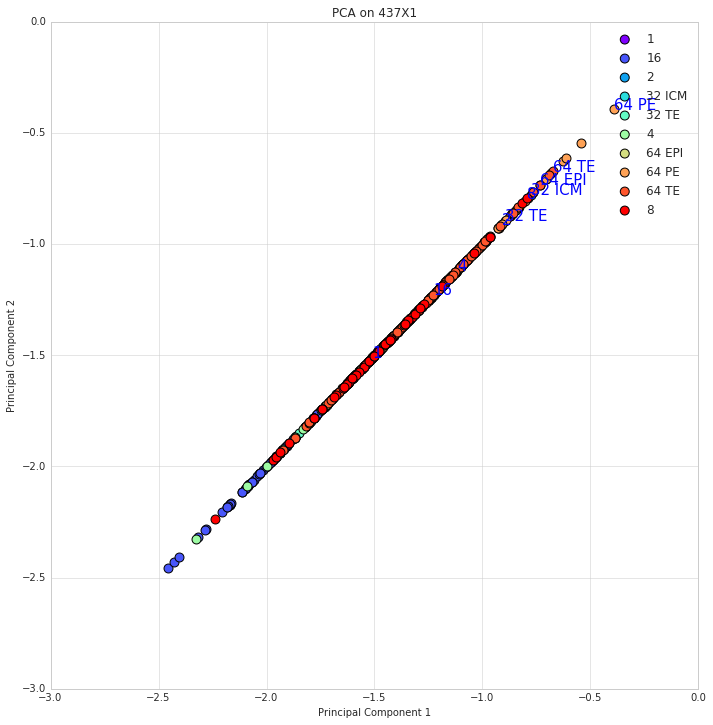

In [23]:
# plot PCA on first two principal components
strLabels = labels.values
uniqueLabels = np.unique(strLabels)
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(uniqueLabels)))
Y=xlatent
Dlatent = 1
with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(10, 10))
        for lab,c in zip(uniqueLabels,colors):
            y1 = Y[strLabels==lab, 0]
            if(Dlatent == 2):
                y2 = Y[strLabels==lab, 1]
            else:
                y2 = y1
                
            plt.scatter(y1,
                        y2,
                        label=lab,
                        c=c,s=80)
            if(Dlatent == 2):
                plt.text(np.min(y1),np.min(y2),lab, fontsize=45, color='blue')
            else:
                plt.text(np.max(y1),np.max(y2),lab, fontsize=15, color='blue')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.title('PCA on %gX%g'%xlatent.shape)



In [24]:
gradientsObj = tf.gradients(obj,[W,mu,sigma2])

import scipy.optimize as opt
with tf.Session() as sess:    
    def objfun(x):
        wvec = x[:D*Q]
        muvc = x[(D*Q):(D*Q+D)]
        sigma2vec = x[(D*Q+D):]
        assert sigma2vec.size == D, 'sigma2vec is ' + str(sigma2vec.shape) +' should be ' + str(D)

        W_ = np.reshape(wvec, (D,Q))
        mu_ = np.reshape(muvc, (1,D))
        sigma2_ = np.reshape(sigma2vec, D)

        return sess.run(gradientsObj, feed_dict={t:T, ct: captureTimes, W:W_, mu:mu_, sigma2:sigma2_})
        
    sess.run(init)
    print sess.run(obj, feed_dict={t:T, ct: captureTimes})
    
    # print objfun(np.array(range(48+48+48), dtype=float) )
    xinit = np.ones((3*D), dtype=float)
    print xinit.shape
    options=dict(display=True, max_iters=10)
    result = opt.minimize(fun=objfun,
                        x0=xinit,
                        method='L-BFGS-B',
                        jac=True, # self._objective returns the objective and the jacobian.
                        options=options)    

1.22025e+08
(144,)


/Users/mqbssaby/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: OptimizeWarning: Unknown solver options: max_iters, display


error: failed in converting 7th argument `g' of _lbfgsb.setulb to C/Fortran array

In [25]:
# testing the objective function
def objfun(x):
    wvec = x[:D*Q]
    muvc = x[(D*Q):(D*Q+D)]
    sigma2vec = x[(D*Q+D):]
    print wvec.shape
    print wvec
    print muvc.shape
    print muvc
    print sigma2vec.shape
    print sigma2vec
    assert sigma2vec.size == D, 'sigma2vec is ' + str(sigma2vec.shape) +' should be ' + str(D)
objfun( np.array(range(48+48+48)) )

(48,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
(48,)
[48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
(48,)
[ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143]


# Dual PPCA
$$\log p(Y|X,a,\sigma) =  -ND/2 \log(2\pi) - D/2 \log |K| -0.5  tr( K^{-1} Y Y^T )  $$
where $$K = a X X^T + \sigma^2 I_N$$

Dimensions
1. $X$ is $N \times Q$.
1. $Y$ is $N \times D$.

To do
1. Prior on capture time $\log p(X) = \sum_n N(ct_i, \sigma_ct)$ where both quantities are fixed.
1. Constant intercept $\mu$. This will be the basis for the branching model.


In [83]:
# Model inputs
t = tf.placeholder(dtype=tf.float32, shape=[N, D]) # Data input
# Parameters
X = tf.Variable(tf.ones([N, Q], dtype=tf.float32)) # pseudotime
alpha = tf.Variable(tf.ones([1], dtype=tf.float32)) # constant bias
sigma2 = tf.Variable(tf.ones([1], dtype=tf.float32)) # constant bias   

sigmaCT = tf.placeholder(dtype=tf.float32, shape=[1]) # capture times uncertainty  
captureTimes= tf.placeholder(dtype=tf.float32, shape=[N,1]) # capture times - assumes Q=1  

In [84]:
def eye(N):
    return tf.diag(tf.ones(tf.pack([N,]), dtype='float32') )

In [86]:
tf.reduce_sum(tf.squared_difference(X, captureTimes))

<tf.Tensor 'Sum_9:0' shape=() dtype=float32>

In [82]:
K =  alpha * tf.matmul(X,tf.transpose(X)) + sigma2 * eye(N)
logdetKSimpleStupid = tf.log(tf.matrix_determinant(K))
L = tf.cholesky(K)
logdetK = 2*tf.reduce_sum(tf.log(tf.diag_part(L)))

YY = tf.matmul(t,tf.transpose(t)) # N X N

negloglik =  - ( -(N*D/2.)*np.log(2*np.pi) - D/2 * logdetK  - 0.5 * tf.trace( tf.matmul(tf.matrix_inverse(K), YY) ) )

negloglik32 = tf.cast(loglik, dtype=tf.float32)

priorCT = -N * 0.5 * tf.log(2*np.pi*sigmaCT^2) - N/(2*sigmaCT) * tf.reduce_sum ( tf.squared_difference(X, captureTimes))

TypeError: Input 'x' of 'LogicalOr' Op has type float32 that does not match expected type of bool.

In [79]:
# Convince ourshelves our logdet trick is good
init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    print sess.run(negloglik, feed_dict={t:T})    

29909.6


In [65]:
gradientsObj = tf.gradients(negloglik,[X,alpha,sigma2])

import scipy.optimize as opt
with tf.Session() as sess:    
    def objfun(x):
        xvec_ = x[:N*Q]
        alpha_ = x[(N*Q):(N*Q+1)]
        sigma2_ = x[(N*Q+1):]
        assert sigma2_.size == 1, 'sigma2vec is ' + str(sigma2_.shape) +' should be ' + str(D)
        print alpha_.shape
        print sigma2_.shape
        X_ = np.reshape(xvec_, (N,Q))
    
        return sess.run(gradientsObj, feed_dict={t:T, X:X_, alpha:alpha_, sigma2:sigma2_})
        
    sess.run(init)
    print sess.run(negloglik, feed_dict={t:T})
    
    # print objfun(np.array(range(48+48+48), dtype=float) )
    xinit = np.ones((N*Q+2), dtype=float) # could initialise using PCA?
    print xinit.shape
    options=dict(display=True, max_iters=10)
    result = opt.minimize(fun=objfun,
                        x0=xinit,
                        method='L-BFGS-B',
                        jac=True, # self._objective returns the objective and the jacobian.
                        options=options)    

29909.6
(439,)
(1,)
(1,)


/Users/mqbssaby/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: OptimizeWarning: Unknown solver options: max_iters, display


error: failed in converting 7th argument `g' of _lbfgsb.setulb to C/Fortran array

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
29909.6
0: 29909.5
1: 29909.5
2: 29909.4
3: 29909.4
4: 29909.3
5: 29909.3
6: 29909.2
7: 29909.1
8: 29909.1
9: 29909
10: 29908.9
11: 29908.9
12: 29908.8
13: 29908.8
14: 29908.7
15: 29908.6
16: 29908.6
17: 29908.5
18: 29908.4
19: 29908.4
20: 29908.3
21: 29908.3
22: 29908.2
23: 29908.1
24: 29908.1
25: 29908
26: 29907.9
27: 29907.9
28: 29907.8
29: 29907.7
30: 29907.7
31: 29907.6
32: 29907.5
33: 29907.5
34: 29907.4
35: 29907.3
36: 29907.3
37: 29907.2
38: 29907.1
39: 29907
40: 29907
41: 29906.9
42: 29906.8
43: 29906.7
44: 29906.7
45: 29906.6
46: 29906.5
47: 29906.5
48: 29906.4
49: 29906.3
50: 29906.2
51: 29906.2
52: 29906.1
53: 29906
54: 29905.9
55: 29905.8
56: 29905.8
57: 29905.7
58: 29905.6
59: 29905.5
60: 29905.4
61: 29905.4
62: 29905.3
63: 29905.2
64: 29905.1
65: 29905
66: 29904.9
67: 29904.9
68: 29904.8
69: 29904.7
70: 29904.6
71: 29904.5
72: 29904.4
73: 29904.3
74: 29904.2
75: 29904.2
76: 29904.1
77: 29904
78: 29903.9
79: 29903.8
80: 29903.7
81: 2990

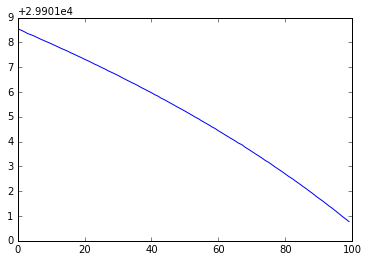

In [73]:
learning_rate = 0.0001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(negloglik) 

with tf.Session() as sess:
    sess.run(init)

    X_init = sess.run(X, feed_dict={t:T})
    alpha_init = sess.run(mu, feed_dict={t:T}) 
    sigma2_init = sess.run(sigma2, feed_dict={t:T} )

    print X_init[:5]
    print sess.run(negloglik, feed_dict={t:T})
    nll = []
    max_iters = 100
    iteration = 0
    while iteration < max_iters:                
        sess.run(optimizer, feed_dict={t:T})
        print '%g: %g'%(iteration, sess.run(negloglik, feed_dict={t:T}))      
        nll.append(  sess.run(negloglik, feed_dict={t:T} ) )
        iteration += 1
        
    X_Conv = sess.run(X, feed_dict={t:T})
    alpha_Conv = sess.run(mu, feed_dict={t:T}) 
    sigma2_Conv = sess.run(sigma2, feed_dict={t:T} )
        
    plt.plot(nll)
    print X_Conv[:5]

In [76]:
print stats.spearmanr(stageN,np.reshape(X_Conv, (N) ))

SpearmanrResult(correlation=0.071389314766221984, pvalue=0.1362273008414206)


In [77]:
X_Conv

array([[ 0.99890226],
       [ 0.99890244],
       [ 0.99890232],
       [ 0.99890232],
       [ 0.99890327],
       [ 0.99890321],
       [ 0.99890304],
       [ 0.99890161],
       [ 0.99890202],
       [ 0.99890167],
       [ 0.99890208],
       [ 0.9989028 ],
       [ 0.99890399],
       [ 0.99890226],
       [ 0.99890292],
       [ 0.99890167],
       [ 0.99890321],
       [ 0.9989025 ],
       [ 0.99890345],
       [ 0.99890327],
       [ 0.9989028 ],
       [ 0.99890244],
       [ 0.99890387],
       [ 0.99890357],
       [ 0.99890298],
       [ 0.99890268],
       [ 0.99890327],
       [ 0.99890345],
       [ 0.99890405],
       [ 0.99890387],
       [ 0.99890369],
       [ 0.99890411],
       [ 0.99890304],
       [ 0.99890274],
       [ 0.99890363],
       [ 0.99890548],
       [ 0.99890411],
       [ 0.998905  ],
       [ 0.99890524],
       [ 0.99890417],
       [ 0.99890381],
       [ 0.99890351],
       [ 0.99890429],
       [ 0.99890393],
       [ 0.99890393],
       [ 0

In [134]:
import GPflow
class GPLVM(GPflow.gpr.GPR):
    def __init__(self, X, Y, kern, mean_function):
        GPflow.gpr.GPR.__init__(self, X, Y, kern, mean_function)
        self.X = GPflow.param.Param(self.X)


In [172]:
captureTimes.shape

(437, 1)

In [178]:
T=genes.values

idxEarly = np.logical_or(np.logical_or(np.logical_or(np.logical_or(captureTimes[:,0] == 1,captureTimes[:,0] == 2),\
        captureTimes[:,0] == 4),captureTimes[:,0] == 8),captureTimes[:,0] == 16)
Tearly = T[idxEarly,:]
labelsEarly = labels[idxEarly]
stageNEarly = stageN[idxEarly]
Nearly = Tearly.shape[0]

In [179]:
# linear GPLVM
m = GPLVM(np.random.randn(Nearly, 2), Tearly, GPflow.kernels.Linear(2), mean_function=GPflow.mean_functions.Constant(np.zeros(D)))

m.likelihood.variance = 0.1
m.likelihood.variance.fixed = True

# Set the prior
muPrior = np.vstack([stageNEarly, np.zeros(Nearly)]).T

varPrior = np.vstack([0.5*np.ones(Nearly), np.ones(Nearly)]).T

m.X.prior = GPflow.priors.Gaussian(muPrior,varPrior)

In [180]:
m.optimize()

compiling tensorflow function...
done
optimization terminated, setting model state


      fun: array([ 12424.26222511])
 hess_inv: <387x387 LbfgsInvHessProduct with dtype=float64>
      jac: array([  8.35356807e-03,   1.25326065e-04,   3.34840889e-03,
        -3.01768901e-03,  -1.23142678e-04,  -3.89445608e-03,
         1.53431840e-03,  -4.90963042e-03,   2.17733740e-03,
        -5.95023309e-03,   1.40389973e-04,  -4.88467756e-03,
        -1.10834886e-03,  -4.54002352e-03,  -1.85404371e-04,
        -4.71285339e-03,   2.79135838e-03,  -4.25154960e-03,
        -2.51802037e-03,   6.75364155e-03,  -3.73857246e-03,
         3.70976580e-03,   3.77047538e-04,  -1.73183243e-03,
         6.24001936e-04,   1.06212180e-03,   1.24117326e-03,
         6.80748782e-03,  -3.52606479e-03,   4.13636025e-03,
        -2.74295328e-03,   2.45629956e-03,  -3.78732499e-03,
         5.82908057e-03,  -3.77016997e-03,   4.71654094e-03,
         5.46412590e-04,   2.94239183e-03,  -4.54420574e-04,
        -1.98679254e-03,  -3.10116942e-03,   6.54350282e-04,
        -3.18930097e-03,   6.38109373e-

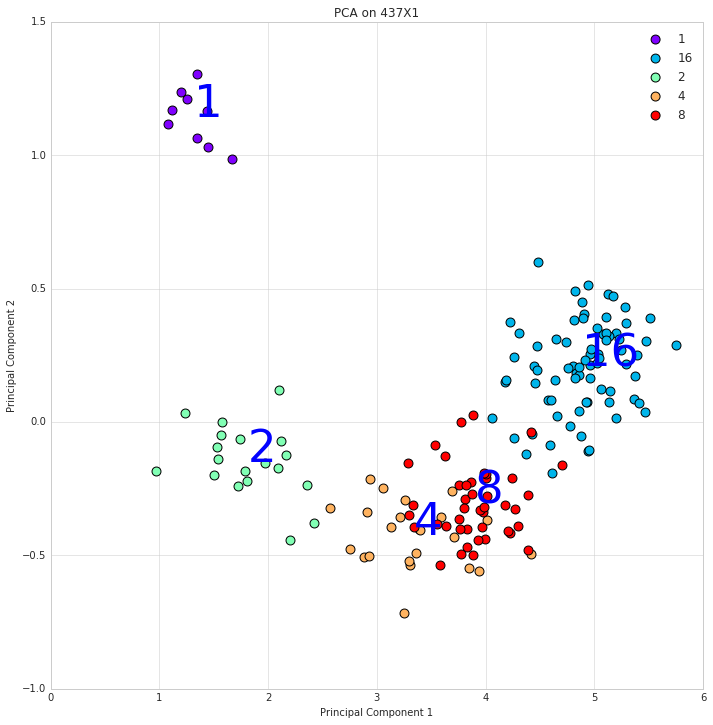

In [181]:
def plot(Y,labelParam):
    # plot PCA on first two principal components
    strLabels = labelParam.values
    uniqueLabels = np.unique(strLabels)
    import matplotlib.cm as cm
    colors = cm.rainbow(np.linspace(0, 1, len(uniqueLabels)))
    Dlatent = 2
    with plt.style.context('seaborn-whitegrid'):
            plt.figure(figsize=(10, 10))
            for lab,c in zip(uniqueLabels,colors):
                y1 = Y[strLabels==lab, 0]
                if(Dlatent == 2):
                    y2 = Y[strLabels==lab, 1]
                else:
                    y2 = y1

                plt.scatter(y1,
                            y2,
                            label=lab,
                            c=c,s=80)
                if(Dlatent == 2):
                    plt.text(np.mean(y1),np.mean(y2),lab, fontsize=45, color='blue')
                else:
                    plt.text(np.max(y1),np.max(y2),lab, fontsize=15, color='blue')
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.legend(loc='upper right')
            plt.tight_layout()
            plt.title('PCA on %gX%g'%xlatent.shape)

plot(m.X._array, labelsEarly)

In [141]:
m.compute_log_prior()

array([-1272.16984494])

In [142]:
m.compute_log_likelihood()

-47209.517359515899

In [165]:
# non-linear GPLVM
k = GPflow.kernels.Matern52(2,active_dims=[0]) + GPflow.kernels.Matern52(2,active_dims=[1]) 
mNL = GPLVM(np.random.randn(N, 2), T, k, mean_function=GPflow.mean_functions.Constant(np.zeros(D)))

mNL.likelihood.variance = 0.1
mNL.likelihood.variance.fixed = True

mNL.kern.matern52_1.lengthscales.fixed = True
mNL.kern.matern52_2.lengthscales.fixed = True

# Set the prior
mNL.X = m.X._array
mNL.X.prior = GPflow.priors.Gaussian(muPrior,varPrior)

In [166]:
mNL.optimize()

compiling tensorflow function...
done
optimization terminated, setting model state


      fun: array([ 23722.10494957])
 hess_inv: <924x924 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.15154585e-01,   4.19874180e-01,   7.74873725e-02,
         2.64045593e-01,  -6.78114691e-01,   6.33530269e-01,
         3.22282583e-01,   5.12935629e-01,  -1.15209217e-01,
         2.65634678e-01,   1.30946941e-01,   3.05030485e-01,
         9.47012585e-01,  -1.24974245e-01,  -1.99293967e-01,
         7.43996415e-01,  -1.73045779e-01,   4.18960125e-01,
        -4.37921149e-01,  -5.76663281e-01,   7.40073192e-01,
        -4.20046668e-01,   1.07115860e-01,   6.06741696e-03,
         2.48776893e-01,  -1.40795446e-02,  -8.79901351e-01,
        -5.17516841e-01,   3.11650118e-01,  -4.32592158e-03,
         7.57136911e-02,  -1.60176891e-01,  -5.75580603e-01,
        -1.35896876e-01,  -3.03353386e-01,  -8.23525958e-01,
        -1.21661185e-01,  -1.62195445e-01,  -7.72065783e-02,
        -1.34713683e-01,  -2.08009488e-01,  -3.31757385e-01,
        -3.92857153e-01,  -4.43200281e-

In [152]:
mNL.likelihood.variance.fixed = False
mNL.optimize()

compiling tensorflow function...
done
optimization terminated, setting model state


      fun: array([ 18733.68661269])
 hess_inv: <926x926 LbfgsInvHessProduct with dtype=float64>
      jac: array([  3.83589737e-02,  -8.37699102e-02,  -2.66314273e-02,
         1.16474931e-01,   2.56271842e-01,   6.73264717e-02,
         3.11713731e-01,   1.73801934e-02,  -1.35495795e-01,
        -8.10358250e-02,   2.23881010e-01,   9.91313808e-02,
         2.24579926e-01,  -2.12776258e-01,   7.86188738e-02,
        -3.83589855e-02,  -2.48317907e-02,  -1.54950459e-01,
        -1.14210431e-01,   2.55937410e-01,   1.65285837e-01,
        -1.11958975e-01,   3.63509451e-01,   5.57821810e-01,
         1.00993673e-01,  -1.22684238e-02,  -2.29602730e-01,
         3.92972957e-01,  -6.17871002e-02,  -1.59059570e-01,
        -2.21550626e-01,  -3.37291682e-01,   2.64726361e-01,
        -1.57484133e-01,  -1.48760580e-01,   1.18470467e-01,
         1.22293858e-03,   1.76180900e-04,   1.22615952e-01,
        -3.08427913e-02,   3.13146912e-01,   4.44690382e-02,
         9.89946267e-02,  -1.26918008e-

In [168]:
print stats.spearmanr(stageN, mNL.X._array[:,0])
mNL.kern

SpearmanrResult(correlation=0.76688393653266551, pvalue=8.1605881742481579e-86)


Name,values,prior,constriant
kern.matern52_2.lengthscales,[ 1.],None,[FIXED]
kern.matern52_2.variance,[ 66.96027707],None,+ve
kern.matern52_1.variance,[ 101.46341509],None,+ve
kern.matern52_1.lengthscales,[ 1.],None,[FIXED]


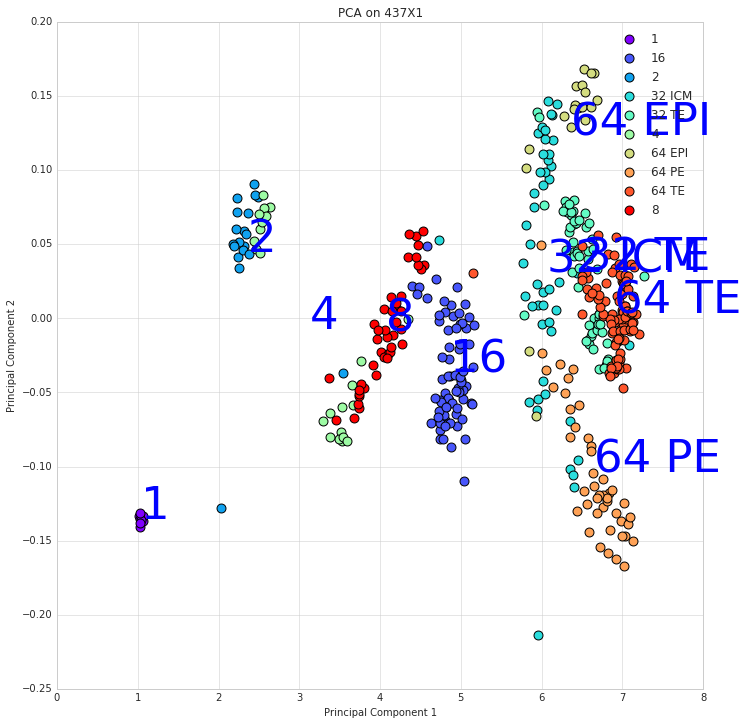

In [155]:
plot(mNL.X._array)

In [157]:
mNL.likelihood

Name,values,prior,constriant
likelihood.variance,[ 0.14131434],None,+ve


In [158]:
stats.spearmanr(stageN, mNL.X._array[:,0])

SpearmanrResult(correlation=0.90970450340031606, pvalue=3.898126059341853e-168)

In [159]:
stats.spearmanr(stageN, m.X._array[:,0])

SpearmanrResult(correlation=0.74359020995488334, pvalue=4.6531837618969284e-78)